In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Apriori and frequent pattern mining
from mlxtend.frequent_patterns import apriori, association_rules

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Timing execution
import time


In [8]:
# Load datasets
connect_data = pd.read_csv('c4_game_database.csv')
chess_data = pd.read_csv('games.csv')
accident_data = pd.read_csv('Road Accident Data.csv')

# Inspect the data
print(connect_data.head())
print(chess_data.head())
print(accident_data.head())


   pos_01  pos_02  pos_03  pos_04  pos_05  pos_06  pos_07  pos_08  pos_09  \
0     1.0     1.0     1.0    -1.0    -1.0     1.0     0.0    -1.0    -1.0   
1     0.0     0.0     1.0     1.0     1.0     1.0     0.0     0.0     0.0   
2     0.0     1.0     0.0     1.0     0.0     0.0     0.0     0.0    -1.0   
3     0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
4     0.0    -1.0    -1.0    -1.0     1.0     0.0     0.0     1.0     1.0   

   pos_10  ...  pos_34  pos_35  pos_36  pos_37  pos_38  pos_39  pos_40  \
0    -1.0  ...     1.0     1.0    -1.0     1.0    -1.0     1.0    -1.0   
1     1.0  ...    -1.0     1.0     1.0    -1.0    -1.0    -1.0     1.0   
2     0.0  ...     0.0    -1.0     1.0    -1.0    -1.0     1.0    -1.0   
3     0.0  ...     0.0     1.0     1.0     1.0    -1.0     1.0    -1.0   
4     1.0  ...     0.0     1.0    -1.0    -1.0     1.0    -1.0     1.0   

   pos_41  pos_42  winner  
0     1.0    -1.0    -1.0  
1     1.0    -1.0     1.0  
2    -1.

In [9]:
# Convert to binary format
connect_data_binary = connect_data.applymap(lambda x: 1 if x > 0 else 0)

# Verify transformation
print(connect_data_binary.head())

C:\Users\samee.WINDOWS-2L0L316\AppData\Local\Temp\ipykernel_17060\1711063276.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  connect_data_binary = connect_data.applymap(lambda x: 1 if x > 0 else 0)


   pos_01  pos_02  pos_03  pos_04  pos_05  pos_06  pos_07  pos_08  pos_09  \
0       1       1       1       0       0       1       0       0       0   
1       0       0       1       1       1       1       0       0       0   
2       0       1       0       1       0       0       0       0       0   
3       0       0       0       1       0       0       0       0       0   
4       0       0       0       0       1       0       0       1       1   

   pos_10  ...  pos_34  pos_35  pos_36  pos_37  pos_38  pos_39  pos_40  \
0       0  ...       1       1       0       1       0       1       0   
1       1  ...       0       1       1       0       0       0       1   
2       0  ...       0       0       1       0       0       1       0   
3       0  ...       0       1       1       1       0       1       0   
4       1  ...       0       1       0       0       1       0       1   

   pos_41  pos_42  winner  
0       1       0       0  
1       1       0       1  
2       

In [10]:
connect_data_binary = connect_data_binary.sample(n=10000, random_state=42)


# Apply Apriori
min_support = 0.05

start_time_connect = time.time()
frequent_itemsets_connect = apriori(connect_data_binary, min_support=min_support, use_colnames=True)
end_time_connect = time.time()

# Display results
print(frequent_itemsets_connect)

# Generate association rules
rules_connect = association_rules(frequent_itemsets_connect, metric="confidence", min_threshold=0.7)

# Display rules
print(rules_connect)

print(f"Execution Time of connect4: {end_time_connect - start_time_connect:.2f} seconds")


g:\anaconda3\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


      support                          itemsets
0      0.0647                          (pos_01)
1      0.1138                          (pos_02)
2      0.1491                          (pos_03)
3      0.2013                          (pos_04)
4      0.1128                          (pos_05)
...       ...                               ...
2530   0.0504  (winner, pos_26, pos_31, pos_39)
2531   0.0516  (pos_40, winner, pos_26, pos_31)
2532   0.0544  (pos_32, winner, pos_26, pos_38)
2533   0.0545  (winner, pos_39, pos_31, pos_33)
2534   0.0509  (winner, pos_39, pos_33, pos_32)

[2535 rows x 2 columns]
                antecedents consequents  antecedent support  \
0  (pos_25, pos_17, pos_33)    (winner)              0.0704   
1  (pos_24, pos_30, pos_18)    (winner)              0.0770   
2  (pos_24, pos_25, pos_23)    (winner)              0.0699   
3  (pos_24, pos_25, pos_26)    (winner)              0.0711   
4  (pos_24, pos_25, pos_31)    (winner)              0.0716   
5  (pos_24, pos_25, p

In [11]:
from collections import Counter
from mlxtend.preprocessing import TransactionEncoder

# Split 'moves' into lists, handle NaN, and invalid entries
chess_data['moves'] = chess_data['moves'].fillna('').apply(lambda x: x.split() if isinstance(x, str) else [])

# Count the most frequent moves
move_counts = Counter([move for moves in chess_data['moves'] for move in moves])

# Select top 500 most frequent moves
top_moves = [move for move, count in move_counts.most_common(500)]

# Filter transactions to include only top moves
transactions_chess_filtered = chess_data['moves'].apply(lambda x: [move for move in x if move in top_moves])

# Sample 10,000 rows for efficiency
transactions_chess_sampled = transactions_chess_filtered.sample(n=1000, random_state=42)

# Encode transactions into a binary matrix
te = TransactionEncoder()
te_array = te.fit(transactions_chess_sampled).transform(transactions_chess_sampled)
chess_binary = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori
min_support = 0.1

start_time_chess = time.time()
frequent_itemsets_chess = apriori(chess_binary, min_support=min_support, use_colnames=True)
end_time_chess = time.time()

# Display frequent itemsets
print(frequent_itemsets_chess)

# Generate association rules
rules_chess = association_rules(frequent_itemsets_chess, metric="confidence", min_threshold=0.7)

# Display rules
print(rules_chess)

print(f"Execution Time of chess: {end_time_chess - start_time_chess:.2f} seconds")

       support                              itemsets
0        0.103                                 (Bb2)
1        0.105                                 (Bb3)
2        0.144                                 (Bb4)
3        0.197                                 (Bb5)
4        0.177                                 (Bb7)
...        ...                                   ...
19543    0.119  (e4, e5, O-O, Nf3, Nf6, d4, d6, Nc3)
19544    0.111  (e4, e5, O-O, Nc6, Nf3, c5, Nf6, d4)
19545    0.119  (e4, e5, O-O, Nc6, Nf3, Nf6, d4, d5)
19546    0.100  (e4, O-O, Nc6, Nf3, Nf6, e6, d4, d5)
19547    0.109  (e4, e5, O-O, Nc6, Nf3, Nf6, d4, d6)

[19548 rows x 2 columns]
                        antecedents     consequents  antecedent support  \
0                             (Bb3)            (e4)               0.105   
1                             (Bb4)           (Nc3)               0.144   
2                             (Bb4)           (Nc6)               0.144   
3                             (Bb4)   

In [12]:
# Select relevant columns and encode as items
columns_to_encode = ['Junction_Control', 'Light_Conditions', 'Weather_Conditions']
accident_data_encoded = pd.get_dummies(accident_data[columns_to_encode])

# Reduce sample size
accident_data_sampled = accident_data_encoded.sample(n=10000, random_state=42)

# Apply Apriori
min_support = 0.05  # Increased support

start_time_accidents = time.time()
frequent_itemsets_accident = apriori(accident_data_sampled, min_support=min_support, use_colnames=True)
end_time_accidents = time.time()

# Display results
print(frequent_itemsets_accident)

# Generate association rules
rules_accident = association_rules(frequent_itemsets_accident, metric="confidence", min_threshold=0.7)

# Display rules
print(rules_accident)

print(f"Execution Time of accidents: {end_time_accidents - start_time_accidents:.2f} seconds")



    support                                           itemsets
0    0.1055             (Junction_Control_Auto traffic signal)
1    0.3120    (Junction_Control_Data missing or out of range)
2    0.4916        (Junction_Control_Give way or uncontrolled)
3    0.0835  (Junction_Control_Not at junction or within 20...
4    0.1925           (Light_Conditions_Darkness - lights lit)
5    0.0530          (Light_Conditions_Darkness - no lighting)
6    0.7397                        (Light_Conditions_Daylight)
7    0.7913            (Weather_Conditions_Fine no high winds)
8    0.1166         (Weather_Conditions_Raining no high winds)
9    0.0729  (Light_Conditions_Daylight, Junction_Control_A...
10   0.0882  (Weather_Conditions_Fine no high winds, Juncti...
11   0.2261  (Light_Conditions_Daylight, Junction_Control_D...
12   0.2402  (Weather_Conditions_Fine no high winds, Juncti...
13   0.0976  (Light_Conditions_Darkness - lights lit, Junct...
14   0.3742  (Light_Conditions_Daylight, Junction_Contr

g:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
g:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
g:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


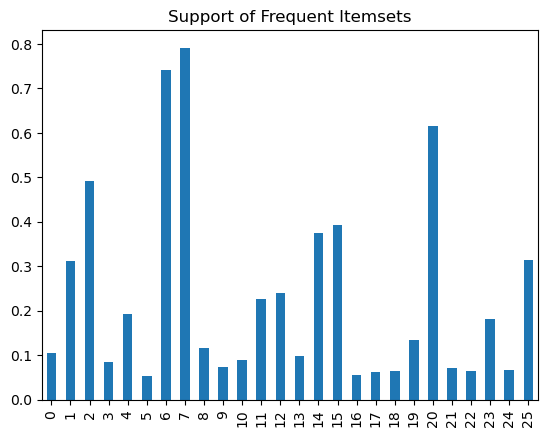

In [13]:
frequent_itemsets_accident['support'].plot(kind='bar', title='Support of Frequent Itemsets')
plt.show()


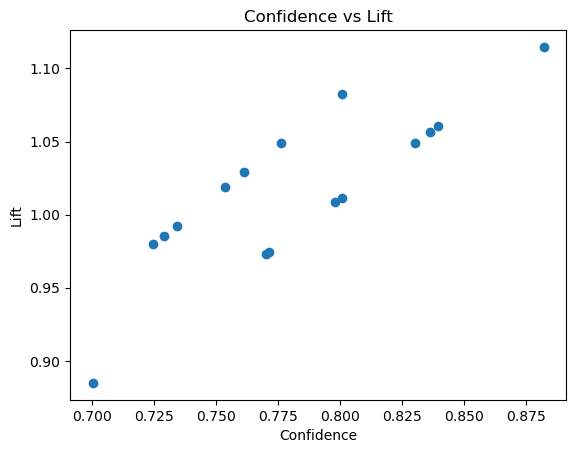

In [15]:
plt.scatter(rules_accident['confidence'], rules_accident['lift'])
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs Lift')
plt.show()
